In [104]:
import numpy as np
import sys
import os
import textwrap
from datetime import datetime as dt
import calendar
import texts as tx
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
})

In [2]:
import sys,time

string = """ H opefully
 A ll
 R espectful
 V isitors
 E njoy
 S ome
 T ipping"""

typing_speed = 390

def slow_type(t):
    for l in t:
        sys.stdout.write(l)
        sys.stdout.flush()
        time.sleep(10.0/typing_speed)
    print('\n')

slow_type(string)

 H opefully
 A ll
 R espectful
 V isitors
 E njoy
 S ome
 T ipping



In [ ]:
STAFF = [
    'diego',
    'maike',
    'grogu',
    'sina',
    'taro',
    'grace',
    'anna bendel',
    'charlotte',
    'isabelle',
    'jessica',
    'anna',
    'juliana',
    'lea',
    'lino',
    'maja',
    'margaretha',
    'marilin',
    'matthias',
    'micaela',
    'mona',
    'anisa',
    'rieka',
    'sabina',
    'sandra',
    'santiago',
    'therese',
    'utz',
    'yunus',
    'veronica',
    'karolina',
    'imer'
]


def is_not_int(var):
    try:
        int(var)
        return False
    except:
        return True

def wich_one(name):
    hit =[]
    for s in STAFF:
        if name in s:
            hit.append(s)

    if len(hit) > 1:
        print('wich one?')
        for i, s in enumerate(hit):
            print(f'{i+1}. {s}')
            
        result = input('--> select: ')
        
        while is_not_int(result):
            result = input('--> select: ')

        return hit[int(result) - 1]

    else:
        return name


file_path = []

root_dir = './json/'
for root, dirs, files in os.walk(root_dir, onerror=None):
    for filename in files:
        if not any(s in filename for s in ['LOG', 'checkpoint', 'DS', 'edited']):
            if 'WHOLE' in filename:
                filename = os.path.join(root, filename)
                if int(filename[7:11]) == 2024:
                    if int(filename[12:14]) >= 9:
                        file_path.append(filename)
                    elif int(filename[12:14]) == 8 and int(filename[15:17]) >= 17:
                        file_path.append(filename)
                elif int(filename[7:11]) >= 2025:
                    file_path.append(filename)


staff_tip = [[] for i in range(len(STAFF))]
staff_date = [[] for i in range(len(STAFF))]


for file in file_path:
    f = open(file)
    jData = json.loads(f.read())

    try:
        for i, staff in enumerate(jData['staff']):
            staff_tip[STAFF.index(staff)].append(jData['tip'][i])
            staff_date[STAFF.index(staff)].append(jData['timestamp'])

    except KeyError:
        print('skip file', file[7:])

for i, j in enumerate(staff_tip):
    print(staff_tip[i], staff_date[i])

In [67]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))
L_IGNORE = ['LOG', 'checkpoint', 'DS', 'edited', 'TextIOWrapper']
L_DICT = ['whole', 'half']
L_TORA = ['total', 'ratio']
AX_WEEKDAY = ['', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
COLOR = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']
PATH = './json/'
SP_DAY = 3
LTX_RATIO = '$/ \\frac{\\textup{€}}{\\textup{h}}$'
LTX_EURO = '$/ \\textup{€}$'
L_LTX = [LTX_EURO, LTX_RATIO]

*some markdown* $\phi$

In [5]:
def txtmd(string):
    return string + '  \n'

L_IGNORE = ['LOG', 'checkpoint', 'DS', 'edited', 'TextIOWrapper']
L_DICT = ['whole', 'half']
L_TORA = ['total', 'ratio']
AX_WEEKDAY = ['', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
COLOR = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']
PATH = './json/'
SP_DAY = 3
LTX_RATIO = '$/ \\frac{\\textup{€}}{\\textup{h}}$'
LTX_EURO = '$/ \\textup{€}$'
L_LTX = [LTX_EURO, LTX_RATIO]

def sorterkey(line):
    year = line[7:11]
    month = line[12:14]
    day = line[15:17]
    time = line[22:27].replace('-', '')
    
    return (int(year), int(month), int(day), int(time))


def ticker(tick, temp):
    minTick = np.floor(np.min(temp) / tick) * tick
    maxTick = np.ceil(np.max(temp) / tick) * tick
    major = np.arange(minTick, maxTick, tick)
    minor = np.arange(minTick, maxTick, tick/2)
    
    return major, minor


def calculate_statistic(files):
    d_return = {
        "date": [],
        "weekday": [],
        "time": [],
        "hour": [],
        "ratio": [],
        "total": [],
        "bar": [],
        "card": [],
        "holiday": [],
    }
    for file in files:
        try:
            f = open(file)
            jData = json.loads(f.read())
        except IndexError:
            print(file)

        s_date, s_time = jData['timestamp'].split('-', 1)
        d_return["date"].append(dt.strptime(s_date, "%d.%m.%Y"))
        d_return["weekday"].append(dt.strptime(s_date, "%d.%m.%Y").weekday())

        if int(s_time[:2]) >= 18:
            d_return["time"].append('PM')
        else:
            d_return["time"].append('AM')

        d_return["hour"].append(jData["hour"])
        
        d_return["ratio"].append(float(jData["ratio"]))

        d_return["total"].append(float(jData["sum"]))

        if jData["bar"]:
            try:
                d_return["bar"].append(float(jData["bar"]))
            except ValueError:
                d_return["bar"].append(False)
        else:
            d_return["bar"].append(False)

        if jData["card"]:
            try:
                d_return["card"].append(float(jData["card"]))
            except:
                d_return["card"].append(False)
        else:
            d_return["card"].append(False)

        d_return["holiday"].append(jData["holiday"])
        
        f.close()

    return d_return


def pseudo(d_whole, d_half):
    part_ampm = [[] for _ in range(2)]
    part_whole = []
    
    for i_whole, whole in enumerate(d_whole['date']):
        match = [index for index, half in enumerate(d_half['date']) if whole.date() == half.date()]
        if len(match) == 1:
            ampm = ['PM', 'AM'].index(d_half['time'][match[0]])
            part = [[] for _ in range(3)]
            
            for i_tora, tora in enumerate(L_TORA + ['hour']):
                part[i_tora] = d_half[tora][match[0]]
    
            total = d_whole['total'][i_whole] - float(part[0])
            hour = sum(d_whole['hour'][i_whole]) - sum(part[2])
    
            ratio = total / hour
    
            row = [total, ratio]
            part_ampm[ampm].append(row + [whole, d_whole['holiday'][i_whole]])
    
    
    for i_half, half in enumerate(d_half['date']):
        prematch = [(i_half, index + i_half + 1) for index, half_b in enumerate(d_half['date'][i_half + 1:]) if half_b.date() == half.date()]
        if len(prematch) == 1:
            i_prematch = prematch[0][0]
            date = d_half['date'][i_prematch]
            part = np.zeros(3)
    
            match = [whole.date() == date.date() for index, whole in enumerate(d_whole['date'])]
            if any(match):
                for i_index in range(2):
                    part[0] += float(d_half['total'][prematch[0][i_index]])
                    part[2] += sum(d_half['hour'][prematch[0][i_index]])
    
                ratio = part[0] / part[2]
        
                row = [part[0], ratio]
                part_whole.append(row + [d_half['date'][i_prematch], d_half['holiday'][i_prematch]])

    return part_whole, part_ampm


def txtmd(string):
    return string + '  \n'

flag = True
files_whole = []
files_half = []

i = 0
for dirpath, dirnames, filenames in os.walk(PATH):
    for f in filenames:
        if not any(s in f for s in L_IGNORE):
            if 'whole' in f.lower():
                files_whole.append(os.path.join(dirpath, f))
            else:
                files_half.append(os.path.join(dirpath, f))
                
            flag = False

files_whole = sorted(files_whole, key=sorterkey)
files_half = sorted(files_half, key=sorterkey)

d_whole = calculate_statistic(files_whole)
d_half = calculate_statistic(files_half)

part_whole, part_ampm = pseudo(d_whole, d_half)

for d in part_whole:
    d_whole['total'].append(d[0])
    d_whole['ratio'].append(d[1])
    d_whole['date'].append(d[2])
    d_whole['weekday'].append(d[2].weekday())
    d_whole['holiday'].append(d[3])
    d_whole['time'].append(False)
    d_whole['hour'].append(False)
    d_whole['bar'].append(False)
    d_whole['card'].append(False)

for i_part, part in enumerate(part_ampm):
    ampm = ['AM', 'PM'][i_part]
    for p in part:
        d_half['total'].append(p[0])
        d_half['ratio'].append(p[1])
        d_half['date'].append(p[2])
        d_half['weekday'].append(p[2].weekday())
        d_half['holiday'].append(p[3])
        d_half['time'].append(ampm)
        d_half['hour'].append(False)
        d_half['bar'].append(False)
        d_half['card'].append(False)

d_all = [d_whole, d_half]

In [96]:
l = [''] + [dt.strptime(str(i+1), "%m").strftime("%b") for i in range(12)]
print(l)

['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


# Month And The Weekend  
| Month || Total $/ \textup{€}$ | Ratio $/ \frac{\textup{€}}{\textup{h}}$ |  
|---|---|---|---|  
January |All|121.44 $\pm$ 25.93|5.52 $\pm$ 1.12  
||Weekday|106.52 $\pm$ 20.77|5.43 $\pm$ 0.64  
||Weekend|133.36 $\pm$ 23.35|5.60 $\pm$ 1.39  
February |All|118.04 $\pm$ 30.68|5.86 $\pm$ 0.84  
||Weekday|99.61 $\pm$ 12.34|5.85 $\pm$ 0.86  
||Weekend|154.90 $\pm$ 21.94|5.89 $\pm$ 0.79  
March |All|112.09 $\pm$ 35.77|5.30 $\pm$ 1.17  
||Weekday|97.41 $\pm$ 26.43|5.40 $\pm$ 1.21  
||Weekend|131.66 $\pm$ 37.19|5.17 $\pm$ 1.10  
April |All|127.48 $\pm$ 51.02|5.44 $\pm$ 1.11  
||Weekday|109.16 $\pm$ 25.56|5.24 $\pm$ 1.14  
||Weekend|161.06 $\pm$ 66.60|5.80 $\pm$ 0.95  
May |All|192.84 $\pm$ 44.09|4.41 $\pm$ 0.66  
||Weekday|178.84 $\pm$ 42.01|4.29 $\pm$ 0.68  
||Weekend|231.35 $\pm$ 20.33|4.76 $\pm$ 0.45  
June |All|169.25 $\pm$ 44.99|4.15 $\pm$ 0.73  
||Weekday|147.67 $\pm$ 34.15|4.05 $\pm$ 0.82  
||Weekend|212.40 $\pm$ 30.75|4.35 $\pm$ 0.44  
July |All|168.01 $\pm$ 59.73|4.39 $\pm$ 0.90  
||Weekday|158.14 $\pm$ 45.74|4.17 $\pm$ 0.79  
||Weekend|182.82 $\pm$ 73.58|4.72 $\pm$ 0.95  
August |All|154.88 $\pm$ 61.44|4.50 $\pm$ 0.93  
||Weekday|128.25 $\pm$ 37.95|4.34 $\pm$ 0.99  
||Weekend|185.95 $\pm$ 68.61|4.69 $\pm$ 0.82  
September |All|160.31 $\pm$ 63.34|4.78 $\pm$ 0.90  
||Weekday|141.71 $\pm$ 49.05|4.73 $\pm$ 1.00  
||Weekend|198.23 $\pm$ 71.70|4.90 $\pm$ 0.63  
October |All|176.16 $\pm$ 72.92|4.91 $\pm$ 0.94  
||Weekday|148.70 $\pm$ 56.24|4.48 $\pm$ 0.79  
||Weekend|209.12 $\pm$ 76.88|5.43 $\pm$ 0.83  
November |All|140.32 $\pm$ 64.45|4.79 $\pm$ 0.95  
||Weekday|133.73 $\pm$ 55.86|4.70 $\pm$ 0.80  
||Weekend|189.08 $\pm$ 95.39|5.42 $\pm$ 1.52  
December |All|144.67 $\pm$ 60.95|5.16 $\pm$ 0.52  
||Weekday|111.83 $\pm$ 35.38|4.92 $\pm$ 0.64  
||Weekend|169.94 $\pm$ 64.36|5.34 $\pm$ 0.31  
    
![Image](./png/month.png)  


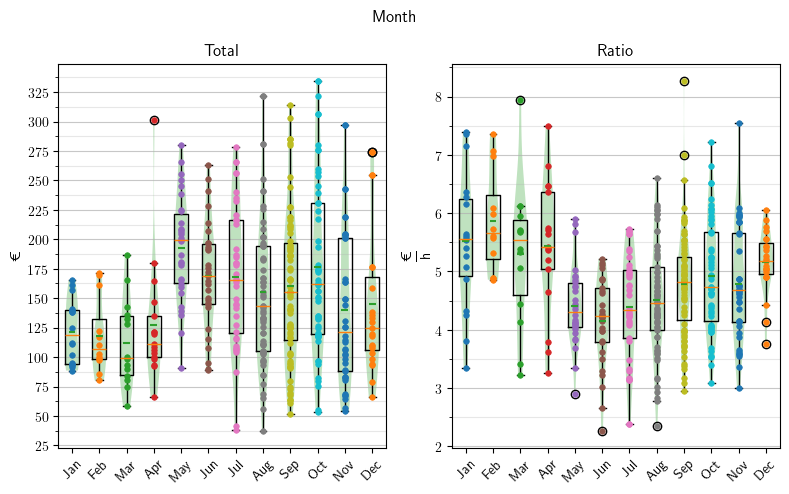

In [105]:
text = list()

text.append(txtmd('# Month And The Weekend'))

text.append(txtmd(f'| Month || Total {LTX_EURO} | Ratio {LTX_RATIO} |'))
text.append(txtmd('|---|---|---|---|'))

month_ratio = [[] for _ in range(12)]
month_total = [[] for _ in range(12)]
mask_weekday = [[] for _ in range(12)]

for i_dict, d in enumerate(d_all):
    for i_d_date, d_date in enumerate(d['date']):
        month_ratio[d_date.month -1].append(d['ratio'][i_d_date])
        month_total[d_date.month -1].append(d['total'][i_d_date])

        if d['weekday'][i_d_date] < 5:
            mask_weekday[d_date.month -1].append(True)
        else:
            mask_weekday[d_date.month -1].append(False)

for i in range(12):
    mask = mask_weekday[i]
    month_name = dt.strptime(str(i+1), "%m").strftime("%B")
    row = f'{month_name} |'

    L_MONTHLY = ['All', 'Weekday', 'Weekend']
    mask_all = [[True]*len(mask), mask, [not elem for elem in mask]]
    for j in range(3):
        row += L_MONTHLY[j] + '|'
        row += f'{round(np.mean(np.array(month_total[i])[mask_all[j]]), 2):.2f}'
        row += f' $\\pm$ {round(np.std(np.array(month_total[i])[mask_all[j]]), 2):.2f}|'
    
        row += f'{round(np.mean(np.array(month_ratio[i])[mask_all[j]]), 2):.2f}'
        row += f' $\\pm$ {round(np.std(np.array(month_ratio[i])[mask_all[j]]), 2):.2f}'

        text.append(txtmd(row))
        row = '||'

month_tora = [month_total, month_ratio]
axs_descr = [''] + [dt.strptime(str(i+1), "%m").strftime("%b") for i in range(12)]

fig, axis = plt.subplots(1, 2, figsize=(8, 5))
fig.suptitle('Month')

for i_ax, ax in enumerate(axis):
    ax.set_title(L_TORA[i_ax].capitalize())
    ax.boxplot(month_tora[i_ax])
    plt.sca(ax)
    plt.xticks(range(13), axs_descr, rotation=45)
    if i_ax == 0:
        plt.ylabel(r'\textup{€}')
        if i_dict == 0:
            tick = 50
        else:
            tick = 25
    else:
        plt.ylabel(r'$\displaystyle\frac{\textup{€}}{\textup{h}}$')
        tick = 1.
    major, minor = ticker(tick, [item for row in month_tora[i_ax] for item in row])
    plt.grid(axis = 'y', which = 'major', alpha = 0.7)
    plt.grid(axis = 'y', which = 'minor', alpha = 0.3)
    ax.set_yticks(major)
    ax.set_yticks(minor, minor = True)
    for i in range(12):
        ax.plot(np.ones(len(month_tora[i_ax][i])) *i +1, month_tora[i_ax][i], ms=4, marker='o', mew=0.5, ls="none")
    ax.violinplot(month_tora[i_ax], positions=range(1, 13), showextrema=False, showmeans=True)

fig.tight_layout()

png_name = './png/month.png'
plt.savefig(png_name, dpi=300)
text.append(txtmd('  '))
text.append(txtmd('![Image](' + png_name + ')'))


with open('./README.md', 'w') as f:
    f.writelines(text)

with open('./README.md', 'r') as f:
    content = f.read()

display(Markdown(content))

In [8]:
text = list()

text.append(txtmd('# Month And The Weekend'))

text.append(txtmd('|| whole | half |'))
text.append(txtmd('|---|---|---|'))

for theme in ['total', 'ratio', 'bar', 'card']:
    if theme == 'bar':
        keyword = 'cash'
    else:
        keyword = theme

    if keyword == 'ratio':
        keyword += ' ' + LTX_RATIO
    else:
        keyword += ' ' + LTX_EURO
        
    row = '|' + keyword + '|'
    for d in d_all:
        if theme in ['card', 'bar']:
            d_temp = list(filter(lambda item: item != 'None', d[theme]))
        else:
            d_temp = d[theme]

        row += f'{np.mean(d_temp):6.3f} $\\pm$ {np.std(d_temp):6.3f}|'

    if theme in ['bar', 'card']:
        text.append(txtmd(row))
        if theme == 'bar':
            keyword = 'cash'
        else:
            keyword = theme
        
        row = '|' + keyword + ' $ / %$|'
        for d in d_all:
            mask = [item not in ['None', 'False', 'false', None, False] for item in d[theme]]
            x1 = np.array(d[theme])[mask]
            x2 = np.array(d['total'])[mask]
            
            pct = np.mean(x1 / x2) * 100
            pct_err = np.std(x1 / x2) * 100
            row += f'{pct:6.3f} $\\pm$ {pct_err:6.3f}|'

    text.append(txtmd(row))


with open('./README.md', 'w') as f:
    f.writelines(text)

with open('./README.md', 'r') as f:
    content = f.read()

display(Markdown(content))

# Overview  
|| whole | half |  
|---|---|---|  
|total $/ \textup{€}$|193.608 $\pm$ 54.673|109.544 $\pm$ 30.927|  
|ratio $/ \frac{\textup{€}}{\textup{h}}$| 4.518 $\pm$  0.783| 5.102 $\pm$  1.108|  
|cash $/ \textup{€}$|66.345 $\pm$ 34.959|42.721 $\pm$ 21.473|  
|cash $ / %$|41.450 $\pm$  8.288|43.644 $\pm$ 10.075|  
|card $/ \textup{€}$|95.460 $\pm$ 52.276|56.304 $\pm$ 29.520|  
|card $ / %$|58.550 $\pm$  8.288|56.356 $\pm$ 10.075|  


In [13]:
count = np.zeros(3)
path_whole = []
path_half = []

root_dir = './json/'
for root, dirs, files in os.walk(root_dir, onerror=None):
    for filename in files:
        if not any(s in filename for s in ['LOG', 'checkpoint', 'DS', 'edited']):
            file_path = os.path.join(root, filename)

            if 'WHOLE' in file_path:
                count[0] += 1
                path_whole.append(file_path)
            elif 'HALF' in file_path:
                count[1] += 1
                path_half.append(file_path)
            else:
                print(file_path)
                count[2] += 1

print(count)
print(len(d_whole['time']), len(d_half['time']))

[179. 176.   0.]
179 176


In [153]:
type(dt.today().weekday())

int

In [164]:
for i_key, key in enumerate(d_half.keys()):
    print(key)

date
weekday
time
hour
ratio
total
bar
card
holiday


In [5]:
text = list()

text.append(txtmd('# AM / PM'))

d_am = {key: [] for key in d_half.keys()}
d_pm = {key: [] for key in d_half.keys()}
d_ampm = [d_am, d_pm]


for i_dict, d in enumerate(d_half['time']):
    ampm = ['AM', 'PM'].index(d)
    for i_key, key in enumerate(d_half.keys()):
        print(d_half[key][i_dict])
        d_ampm[ampm][key].append(d_half[key][i_dict])

for i_dict, d in enumerate(d_ampm):
    text.append(txtmd('## ' + ['AM', 'PM'][i_dict]))
    plt_set = []

    fig, axs = plt.subplots(1, 2, figsize=(8, 5))
    fig.suptitle(['AM', 'PM'][i_dict])
    every = [[] for _ in range(2)]
    normal = [[] for _ in range(2)]
    weekend = [[] for _ in range(2)]
    holiday = [[] for _ in range(2)]
    special = [[] for _ in range(2)]
    special_f = [[] for _ in range(2)]

    axs_descr = ['All',
                'Normal',
                'Weekend',
                'Holiday',
                'Special',
                'Special\&Friday']


    for i_key, key in enumerate(L_TORA):
        every[i_key] = d[key]
        for i_day, day in enumerate(d['weekday']):
            if 4 < day < 7:
                weekend[i_key].append(d[key][i_day])
            else:
                normal[i_key].append(d[key][i_day])

        mask_h = [i.lower() not in ['false', 'offline'] for i in d['holiday']]
        holiday[i_key] = np.array(d[key])[mask_h]

        mask_sp = [4 < i < 7 for i in d['weekday']]
        mask_sp = [h or sp for h, sp in zip(mask_h, mask_sp)]
        special[i_key] = np.array(d[key])[mask_sp]

        mask_sp = [3 < i < 7 for i in d['weekday']]
        mask_sp = [h or sp for h, sp in zip(mask_h, mask_sp)]
        special_f[i_key] = np.array(d[key])[mask_sp]

        plt_special = [every[i_key],
                       normal[i_key],
                       weekend[i_key],
                       holiday[i_key],
                       special[i_key],
                       special_f[i_key]]
        
        plt_set.append(plt_special)

        axs[i_key].set_title(key.capitalize())
        axs[i_key].boxplot(plt_special)
        plt.sca(axs[i_key])
        plt.xticks(range(7), [''] + axs_descr, rotation=45)
        if i_key == 0:
            plt.ylabel(r'$\textup{€}$')
            if i_dict == 0:
                tick = 50
            else:
                tick = 25
        else:
            plt.ylabel(r'$\displaystyle\frac{\textup{€}}{\textup{h}}$')
            tick = .5
        major, minor = ticker(tick, [item for row in plt_special for item in row])
        plt.grid(axis = 'y', which = 'major', alpha = 0.7)
        plt.grid(axis = 'y', which = 'minor', alpha = 0.3)
        axs[i_key].set_yticks(major)
        axs[i_key].set_yticks(minor, minor = True)
        for i in range(6):
            axs[i_key].plot(np.ones(len(plt_special[i])) *i +1, plt_special[i], ms=4, marker='o', mew=0.5, ls="none", color=COLOR[i])
        axs[i_key].violinplot(plt_special, positions=range(1, 7), showextrema=False, showmeans=True)

    text.append(txtmd('||total '+LTX_EURO+'|ratio '+LTX_RATIO+'|count|'))
    text.append(txtmd('|---|---|---|---|'))
    
    for i in range(len(plt_special)):
        row = '|' + axs_descr[i] + '|'
        for j in range(2):
            row += f'{np.mean(plt_set[j][i]):6.2f}'
            row += f' $\\pm$'
            row += f'{np.std(plt_set[j][i]):6.2f}|'

        row += f'{len(plt_special[i])}'
        text.append(txtmd(row))

with open('./README.md', 'w') as f:
    f.writelines(text)

with open('./README.md', 'r') as f:
    content = f.read()

display(Markdown(content))

NameError: name 'txtmd' is not defined

In [120]:
dt.today().date(

datetime.date(2024, 9, 21)

In [197]:
'a.b.c'.rsplit('.', 1)

['a.b', 'c']

In [ ]:
import ferienfeiertage as ff
import time

import numpy as np
import os
from datetime import datetime as dt
import calendar
import warnings
import subprocess
import json
from urllib import request
import socket
import matplotlib.pyplot as plt

from harvest_func import abort, git_update, fcalctip, is_connected

offline = []

input('you sure?')

root_dir = './json/'
for root, dirs, files in os.walk(root_dir, onerror=None):
    for filename in files:
        if not any(s in filename for s in ['LOG', 'checkpoint', 'DS', 'edited']):
            file_path = os.path.join(root, filename)
            offline.append(file_path)

for i, file in enumerate(offline):
    print(i, len(offline))
    f = open(file)
    jData = json.loads(f.read())
    
    flag = True
    before = jData['holiday']
    
    jData['holiday'] = ff.check(dt.strptime(jData['timestamp'], '%d.%m.%Y-%H:%M'), name=True)
    print(jData['timestamp'], before, jData['holiday'])
    time.sleep(1)
    
    with open(file, 'w') as f_json:
        json.dump(jData, f_json)


print('done')